<a href="https://colab.research.google.com/github/NeelamBhatiya/Twitter-Sentiment-Analysis/blob/master/Sentiment_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Enter keyword to searchb about: modi
Enter how many tweets to analyze:10000
PM Modi dismisses economists’ claim of rise in unemployment due to demonetisation https://t.co/QobCnN26wO -Bkack mo… https://t.co/jTsLwdYc7F
PM Modi dismisses economists’ claim of rise in unemployment due to demonetisation https://t.co/QobCnN26wO -Ordinary… https://t.co/Hr2Bi7OAuk
PM Modi dismisses economists’ claim of rise in unemployment due to demonetisation https://t.co/QobCnN26wO -Demoniti… https://t.co/sqZx5LzOw0
Modi lists Rs 2.5 crore worth assets, MA degree from Gujarat University in election affidavit… https://t.co/jM0juvvuSd
Will deposit money from NYAY scheme in bank accounts opened by Modi: Rahul Gandhi https://t.co/aMtqct52tx -The BJP… https://t.co/4HoPs0Iz1E
PM Modi's Varanasi Roadshow Today In Mega Prelude To Filing Papers  
Read More - https://t.co/ueNnk1YD7v
@PMOIndia… https://t.co/vryyf9rodU
Lok Sabha elections 2019- ‘If PM Modi returns…’: Arvind Kejriwal jabs Rahul Gandhi for failed alliance

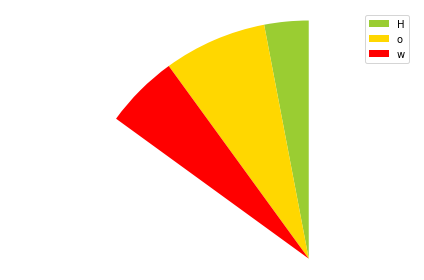

In [0]:
import sys
import tweepy
from textblob import TextBlob
import matplotlib.pyplot as plt

def percentage(part,whole):
  return 100* float(part)/float(whole)

consumerKey="t20Ezt0s921FkxyQtFIAxWrQi"
consumerSecret="RMk8y9CvTAeqZ96c3nFJBrVSjBbPzotOI2XPBhvKoCsSLoZCrs"
accessToken="728141389314203648-IgkPhWprATF2osbMeJgC9uWFsRPOJ6L"
accessTokenSecret="8H9T66ob2Dh7J7kX4qu5FV59LUsDwg6Sbpd72W2lL5Iz8"

auth = tweepy.OAuthHandler(consumer_key=consumerKey, consumer_secret=consumerSecret)
auth.set_access_token(accessToken, accessTokenSecret)
api = tweepy.API(auth)

#
searchTerm = input("Enter keyword to searchb about: ")
noOfSearch = int(input("Enter how many tweets to analyze:"))

tweets = tweepy.Cursor(api.search, q=searchTerm, lang="English").items(noOfSearch)


positive = 0
negative = 0
neutral = 0
polarity = 0
coun=0

for t in tweets:
  print(t.text)
  coun=coun+1
  analysis = TextBlob(t.text)
  polarity += analysis.sentiment.polarity

  if (analysis.sentiment.polarity == 0):
    neutral += 1

  elif (analysis.sentiment.polarity < 0.00):
    negative += 1

  elif (analysis.sentiment.polarity > 0.00):
    positive += 1
positive = percentage(positive, noOfSearch)
negative = percentage(negative, noOfSearch)
neutral = percentage(neutral, noOfSearch)


positive = format(positive, '.2f')
negative = format(negative, '.2f')
neutral = format(neutral, '.2f')
print(coun)

print("How people are reacting on " + searchTerm + "by analyzing" + str(noOfSearch) + "Tweets.")

if (polarity == 0):
  print("Neutral")
elif (polarity < 0):
  print("Negative")
elif (polarity > 0):
  print("Positive")

labels = ['Positive[' + str(positive) + '%]', 'Neutral[' + str(neutral) + '%]',
          'Negative[' + str(negative) + '%]']
sizes = [positive, neutral, negative]
colors = ['yellowgreen', 'gold', 'red']
patches, texts = plt.pie(sizes, colors=colors, startangle=90)
plt.legend('How people are reacting on ' + searchTerm + 'by analyzing' + str(noOfSearch) + 'Tweets.')
plt.axis('equal')
plt.tight_layout()
plt.show()

  # analysis=TextBlob(tweet.text)